<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2 - Exploratory Data Analysis 📌
</div>

## **IMPORT LIBRARY** 🎄

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 1: Đọc dữ liệu đã được tiền xử lý 🔥
</div>

In [122]:
df = pd.read_csv('../../Data/2425_QC_cleaned.csv')
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  BƯỚC 2: Phân tích các cột dữ liệu số sử dụng Descriptive Statistics 🔥
</div>

Descriptive Statistics cho thấy các đặc điểm của các cột dữ liệu số. Nó cho chúng ta thấy những thông tin như:
- Mean (Giá trị trung bình)
- Median (Giá trị trung vị)
- Mode (Giá trị yếu vị)
- Quantiles (Các phân vị): Quartiles (Tứ phân vị)
- Range và IQR (Interquartile Range)
- Variance (Phương sai) và Standard deviation (Độ lệch chuẩn)
- Coefficient of Variation (Hệ số biến thiên)
- Skewness (Độ lệch)
- Standard Error (Sai số chuẩn)
- Correlation (Hệ số tương quan)

In [123]:
numerical_columns = ['Area Income',	'Age', 'Daily Time Spent on Site', 'Daily Internet Usage']
df_copy = df[numerical_columns].copy()
df_copy.describe()

,Area Income,Age,Daily Time Spent on Site,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55025.321364,36.018000,65.000200,180.000100
std,13343.228619,8.779907,15.853615,43.902339
min,19373.553750,19.000000,32.600000,104.780000
25%,47031.802500,29.000000,51.360000,138.830000
50%,57012.300000,35.000000,68.215000,183.130000
75%,65470.635000,42.000000,78.547500,218.792500
max,79484.800000,61.000000,91.430000,269.960000


📊 `Trực quan hoá phân phối`

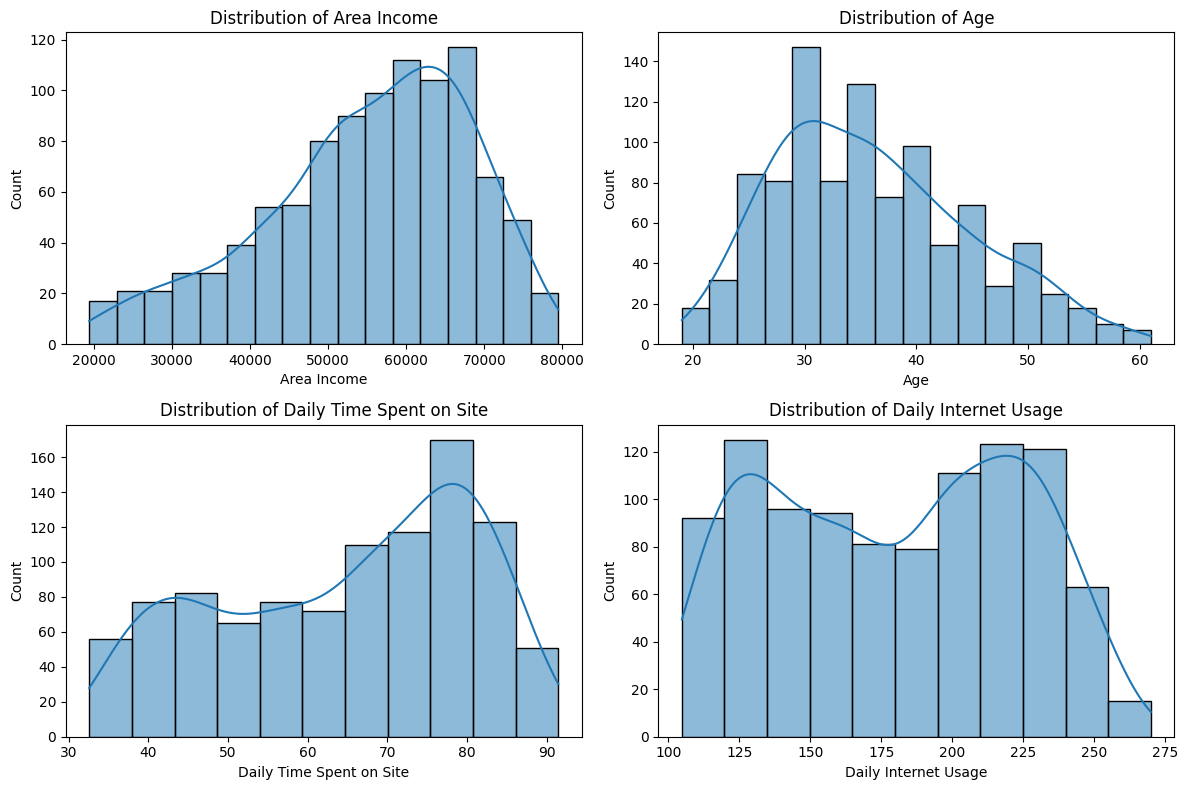

In [124]:
# Create subplots - 2 rows, 2 columns for 4 features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjusting the figure size and grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot histogram and KDE in the i-th subplot
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


📏 `Tính toán độ lệch (skewness)`

In [125]:
skewness = df[numerical_columns].skew()
skewness

Area Income                -0.620982
Age                         0.478471
Daily Time Spent on Site   -0.371760
Daily Internet Usage       -0.033537
dtype: float64

📈`NHẬN XÉT:`
- Dựa vào kết quả phân tích ở trên, chúng ta có thể thấy rẳng các giá trị `Daily Time Spent on Site`, `Area Income`, `Age`, có xu hướng phân bố không đồng đều, một ví dụ điển hình là có đuôi dài hơ.

- Trong khi đó, giá trị `Daily Internet Usage` được phân bố khá đồng đều và chỉ lõm ở một phần nhỏ ở giữa biểu đồ. 

- Ngoài ra, kết quả tính toán độ lệch (skewness) cũng cho thấy `Daily Internet Usage` có giá trị độ lệch gần nhất với 0, trong khi `Daily Time Spent on Site`, `Age` và `Area Income` rất xa 0.

### **Quan sát** 💬

Mọi số liệu thống kê đều ổn định và không gặp bất cứ vấn đề gì.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 3: Phân tích đơn biến trong các cột dữ liệu số 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** Thời gian sử dụng internet của các users phân bố như nào ?

✅  **Mục đích của việc trả lời câu hỏi:**
- Hiểu rõ hành vi sử dụng internet của người dùng, bao gồm thời gian trung bình họ sử dụng internet mỗi ngày.
- Xác định các phân bố về mức độ sử dụng internet (ví dụ: sử dụng ít, trung bình, nhiều) để hỗ trợ cho các chiến lược cá nhân hóa hoặc tối ưu hóa quảng cáo.
- Phát hiện các nhóm người dùng khác nhau dựa trên mức độ sử dụng internet để đưa ra các đề xuất hoặc điều chỉnh chiến lược phù hợp.

💡  **Cách để tìm ra câu trả lời**: thông qua cột 'Daily Internet Usage'

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Tính các thống kê mô tả cơ bản

In [126]:
print("Thống kê mô tả:")
print(df['Daily Internet Usage'].describe())

Thống kê mô tả:
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.792500
max       269.960000
Name: Daily Internet Usage, dtype: float64


**Bước 2**: Vẽ biểu đồ Histogram

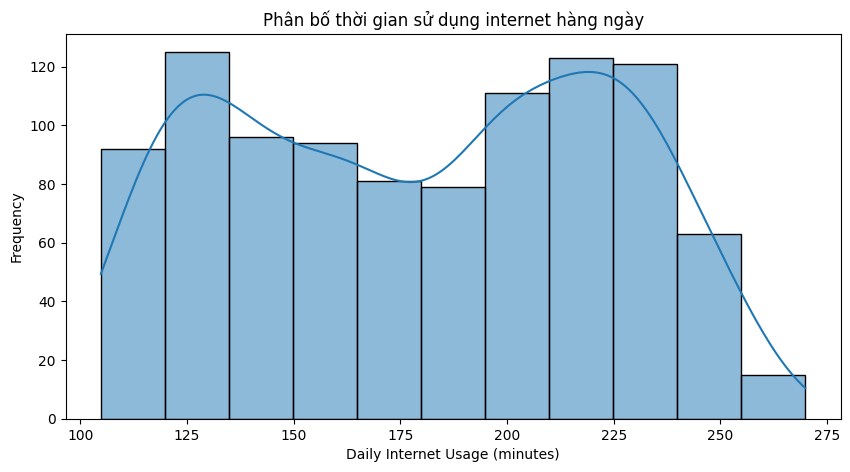

In [127]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Internet Usage'], kde=True)
plt.title('Phân bố thời gian sử dụng internet hàng ngày')
plt.xlabel('Daily Internet Usage (minutes)')
plt.ylabel('Frequency')
plt.show()

**Bước 2**: Vẽ biểu đồ Boxplot

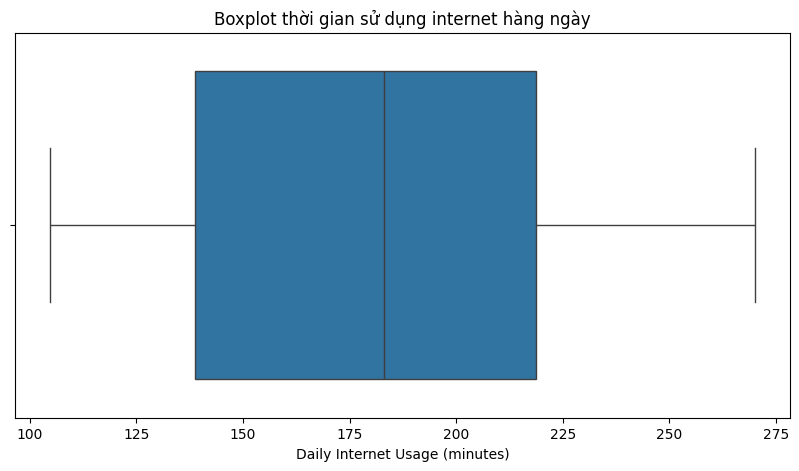

In [128]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Daily Internet Usage'])
plt.title('Boxplot thời gian sử dụng internet hàng ngày')
plt.xlabel('Daily Internet Usage (minutes)')
plt.show()

### **Quan sát** 💬
- Biểu đồ histogram và đường mật độ cho thấy phân bố thời gian sử dụng internet không hoàn toàn đối xứng, có vẻ hơi lệch về bên phải.
- Điều này có thể cho thấy rằng một số người dùng có xu hướng sử dụng internet nhiều hơn trung bình.
- Đa số người dùng có thời gian sử dụng internet nằm trong khoảng từ 125 đến 225 phút mỗi ngày. Đây là khoảng thời gian mà số lượng người dùng cao nhất (tập trung nhiều cột cao trong biểu đồ).
- Có sự phân nhóm khá rõ ràng: phần lớn người dùng có mức sử dụng trung bình, trong khi một số ít người dùng có thời gian sử dụng cao hơn (từ 225 phút trở lên) và thấp hơn (dưới 125 phút).

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** Quốc gia và thành phố nào có nhiều người dùng nhất

✅  **Mục đích của việc trả lời câu hỏi:**
- Giúp doanh nghiệp tập trung nguồn lực, tối ưu hóa chiến lược quảng cáo và nhắm mục tiêu đến các khu vực có tiềm năng nhất
- Hỗ trợ trong việc cung cấp dịch vụ phù hợp với đặc điểm văn hóa và nhu cầu của từng khu vực

💡  **Cách để tìm ra câu trả lời**: thông qua hai cột 'Country' và 'City'

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Đếm số lượng người dùng theo quốc gia

In [129]:
top_countries = df['Country'].value_counts().head(10)  # Lấy 10 quốc gia có nhiều người dùng nhất
print("Các quốc gia có nhiều người dùng nhất:")
print(top_countries)

Các quốc gia có nhiều người dùng nhất:
Country
Czech Republic    9
France            9
Senegal           8
Peru              8
Greece            8
Micronesia        8
Liberia           8
Turkey            8
Afghanistan       8
South Africa      8
Name: count, dtype: int64


**Bước 2**: Đếm số lượng người dùng theo thành phố

In [130]:
top_cities = df['City'].value_counts().head(10)  # Lấy 10 thành phố có nhiều người dùng nhất
print("\nCác thành phố có nhiều người dùng nhất:")
print(top_cities)


Các thành phố có nhiều người dùng nhất:
City
Lisamouth          3
Williamsport       3
West Amanda        2
East Timothy       2
Lake Patrick       2
Wrightburgh        2
New Sheila         2
Port Juan          2
New Jessicaport    2
Millerbury         2
Name: count, dtype: int64


**Bước 3**: Trực quan hóa bằng biểu đồ cột

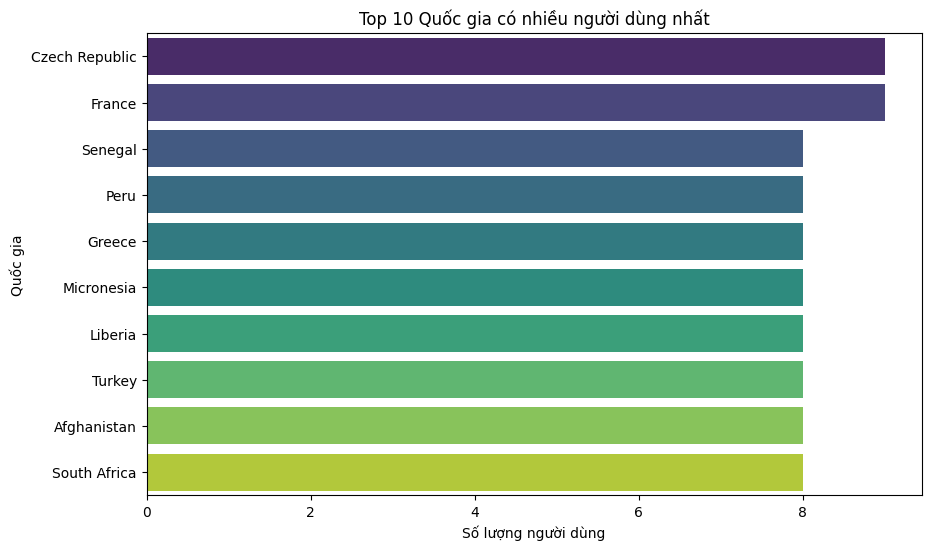

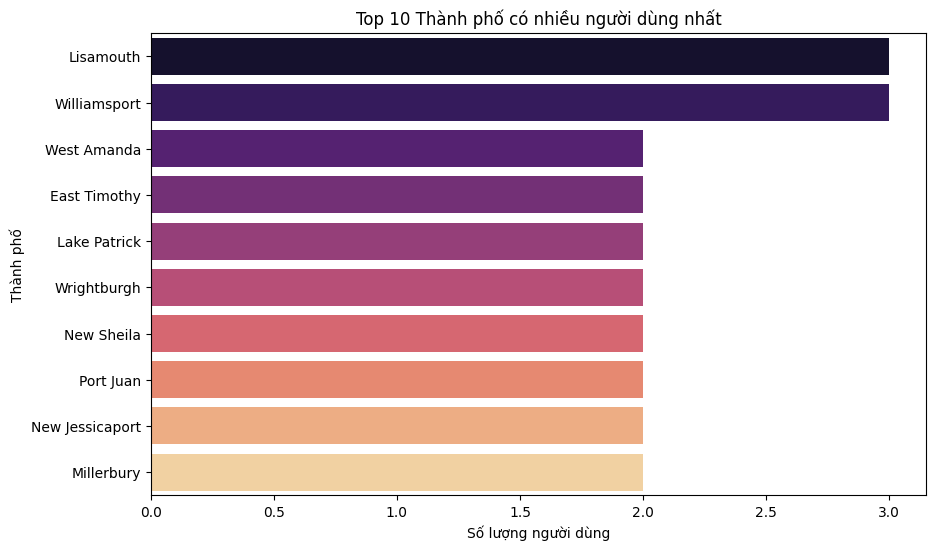

In [131]:
# Trực quan hóa số lượng người dùng theo quốc gia
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Quốc gia có nhiều người dùng nhất")
plt.xlabel("Số lượng người dùng")
plt.ylabel("Quốc gia")
plt.show()

# Trực quan hóa số lượng người dùng theo thành phố
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="magma", dodge=False, legend=False)
plt.title("Top 10 Thành phố có nhiều người dùng nhất")
plt.xlabel("Số lượng người dùng")
plt.ylabel("Thành phố")
plt.show()

### **Quan sát** 💬
- Top các quốc gia có lượng người dùng cao nhất đến từ nhiều khu vực trên thế giới, bao gồm Czech Republic, France, Senegal, Turkey, và South Africa.
- Số lượng người dùng phân bố khá đồng đều, với số người dùng cao nhất chỉ là 9 (Czech Republic và France). Điều này cho thấy không có quốc gia nào chiếm phần lớn người dùng, mà thay vào đó là một mạng lưới người dùng phân tán khắp nơi.
- Các thành phố như Lisamouth, Williamsport, và một số thành phố khác có mức độ người dùng tương đối cao. Điều này có thể là cơ hội để đội ngũ marketing nhắm đến các khu vực này với các quảng cáo hoặc ưu đãi phù hợp nhằm tăng sự trung thành của người dùng hiện tại và thu hút thêm người dùng mới.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 4: Mô tả mối tương quan giữa các cột trong tập dữ liệu 🔥
</div>

Bây giờ chúng ta sẽ xem xét các cột dữ liệu có sẵn trong tập dữ liệu để xác định và phân tích mối quan hệ giữa chúng. Sau đó là xác định những cột dữ liệu nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu của chúng ta.  

Bằng cách tính toán và trực quan hóa, Python cho phép chúng ta tạo ma trận tương quan, đây là bảng biểu thị các hệ số tương quan giữa các biến khác nhau.

### **Ma trận tương quan**

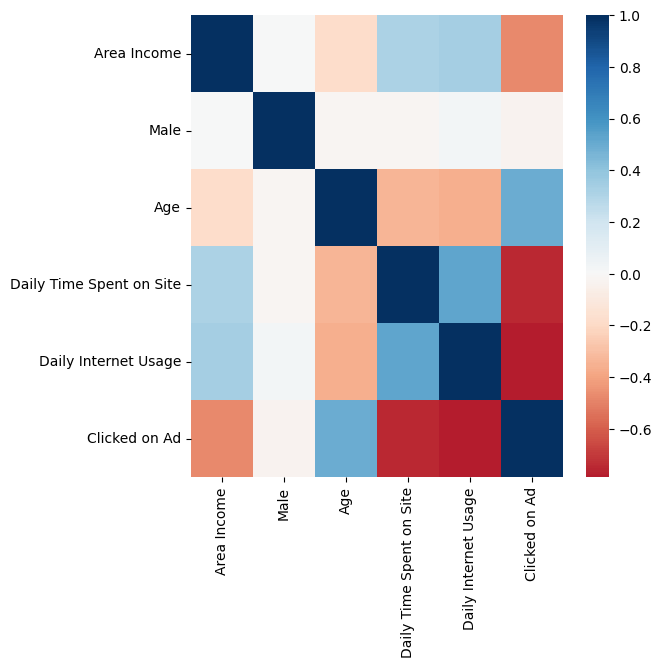

In [132]:
df_copy = df.select_dtypes(include='number')
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **Bảng hệ số tương quan**

In [133]:
df_copy.corr()

,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
Area Income,1.000000,0.002524,-0.184454,0.312198,0.339280,-0.476905
Male,0.002524,1.000000,-0.022045,-0.018951,0.028012,-0.038027
Age,-0.184454,-0.022045,1.000000,-0.333021,-0.367484,0.493874
Daily Time Spent on Site,0.312198,-0.018951,-0.333021,1.000000,0.518658,-0.748117
Daily Internet Usage,0.339280,0.028012,-0.367484,0.518658,1.000000,-0.786539
Clicked on Ad,-0.476905,-0.038027,0.493874,-0.748117,-0.786539,1.000000


### **Quan sát** 💬
- Có một vài cột dữ liệu có mỗi tương quan khá mạnh với những cột khác, điển hình như là `Clicked on Ad`, Daily `Time Spent on Site`, `Daily Internet Usage`.
- Các cột khác như `Clicked on Ad`, `Area Income`, `Age`, có hệ số tương quan ở mức vừa phải.
- Còn lại các cột khác thì có hệ số tương quan khá yếu.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 5: Phân tích hai biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** Có mối quan hệ (xu hướng tăng hoặc giảm) nào giữa tuổi tác và việc nhấp vào quảng cáo không?

✅  **Mục đích của việc trả lời câu hỏi:**
- Xác định xem có mối liên hệ giữa tuổi tác và việc nhấp vào quảng cáo hay không sẽ giúp hiểu rõ hơn về thói quen và hành vi của các nhóm tuổi khác nhau.
- Nếu có mối quan hệ (ví dụ: tuổi càng cao thì càng ít nhấp vào quảng cáo), chúng ta có thể tối ưu hóa chiến lược quảng cáo phù hợp với từng nhóm tuổi.

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Nhóm dữ liệu và tính tỷ lệ nhấp vào quảng cáo theo từng nhóm tuổi

In [134]:
from scipy.stats import pearsonr

age_click_rate = df.groupby("Age")["Clicked on Ad"].mean()

**Bước 2**: Vẽ biểu đồ xu hướng giữa tuổi tác và tỷ lệ nhấp vào quảng cáo

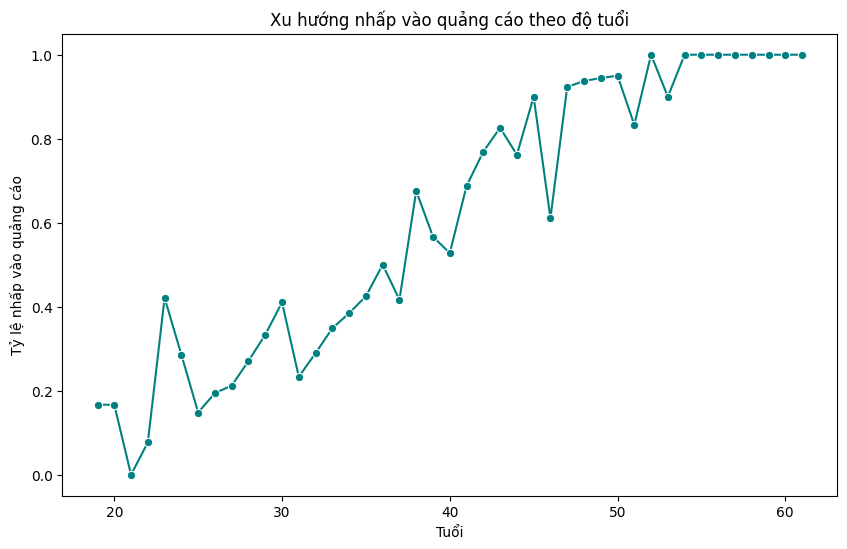

In [135]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_click_rate.index, y=age_click_rate.values, marker='o', color="teal")
plt.title("Xu hướng nhấp vào quảng cáo theo độ tuổi")
plt.xlabel("Tuổi")
plt.ylabel("Tỷ lệ nhấp vào quảng cáo")
plt.show()

**Bước 3**: Tính hệ số tương quan

In [136]:
corr, _ = pearsonr(df["Age"], df["Clicked on Ad"])
print(f"Hệ số tương quan giữa Tuổi và Clicked on Ad: {corr:.2f}")

Hệ số tương quan giữa Tuổi và Clicked on Ad: 0.49


### **Quan sát** 💬
- Hệ số tương quan giữa Tuổi và Clicked on Ad là 0.49, cho thấy có mối quan hệ tích cực vừa phải giữa hai biến này. Điều này có nghĩa là khi tuổi tăng, tỷ lệ nhấp vào quảng cáo cũng có xu hướng tăng lên. Tuy nhiên, hệ số 0.49 không đủ cao để khẳng định mối quan hệ mạnh mẽ mà chỉ cho thấy một xu hướng tăng vừa phải.
- Những người dùng lớn tuổi hơn (từ khoảng 35 trở lên) có xu hướng nhấp vào quảng cáo cao hơn so với người dùng trẻ tuổi.
- Với kết quả này, các nhà quảng cáo có thể cân nhắc điều chỉnh nội dung quảng cáo và ưu tiên hiển thị nhiều hơn cho nhóm người dùng từ 35 tuổi trở lên, đặc biệt là từ 45 tuổi trở lên, vì nhóm này có tỷ lệ nhấp vào quảng cáo cao.

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 5** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 6** 🔔

❓  **Câu hỏi đề ra:** Liệu có có quốc gia hoặc thành phố nào có users có xu hướng click vào quảng cáo hay không?

✅  **Mục đích của việc trả lời câu hỏi:** Điều này có thể giúp các nhà quảng cáo tìm ra các địa điểm địa lý có tiềm năng thu hút người dùng nhấp vào quảng cáo nhiều hơn, từ đó tối ưu hóa chiến dịch quảng cáo theo khu vực.

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Tính tỷ lệ nhấp vào quảng cáo trung bình theo quốc gia và thành phố

In [137]:
country_click_rate = df.groupby('Country')['Clicked on Ad'].mean().sort_values(ascending=False).head(10)
city_click_rate = df.groupby('City')['Clicked on Ad'].mean().sort_values(ascending=False).head(10)

**Bước 2**: Vẽ biểu box plot để quan sát sự khác biệt

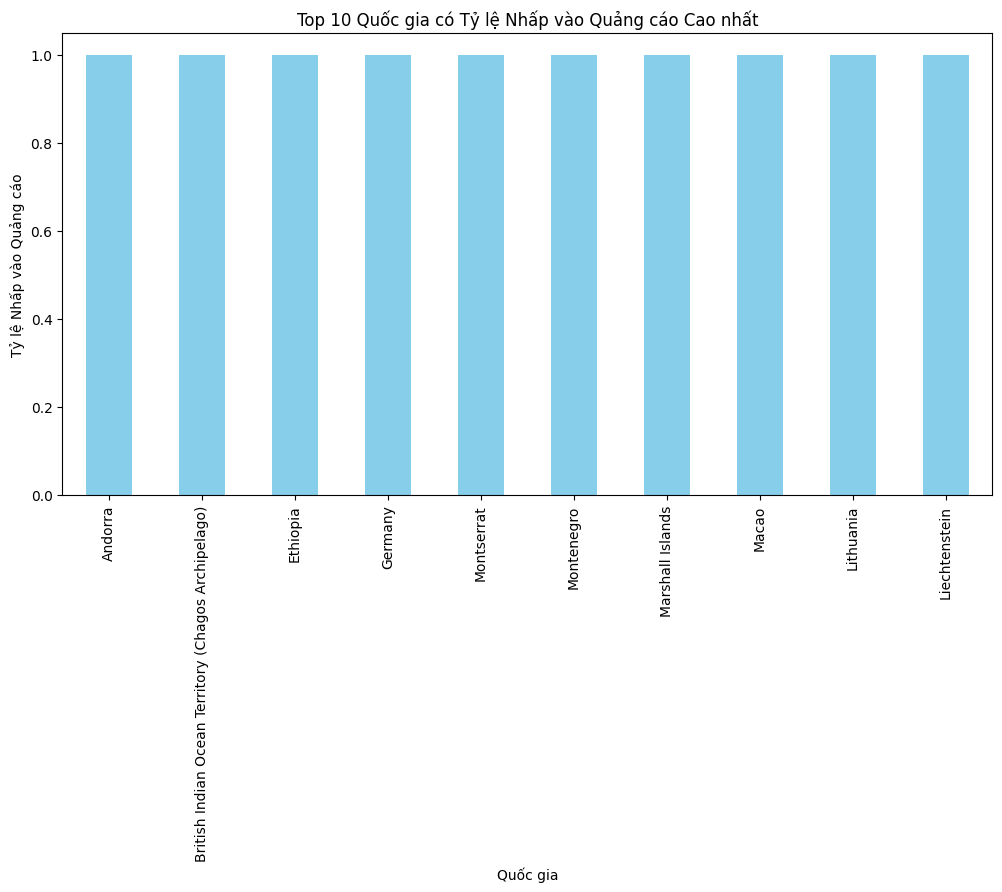

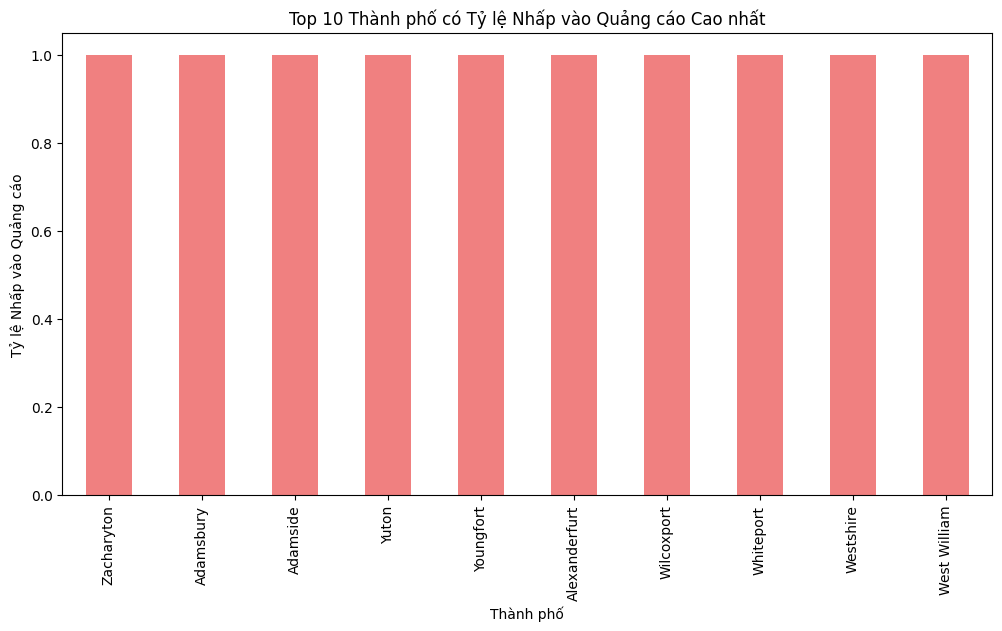

In [138]:
plt.figure(figsize=(12, 6))
country_click_rate.plot(kind='bar', color='skyblue')
plt.title('Top 10 Quốc gia có Tỷ lệ Nhấp vào Quảng cáo Cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ Nhấp vào Quảng cáo')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
city_click_rate.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Thành phố có Tỷ lệ Nhấp vào Quảng cáo Cao nhất')
plt.xlabel('Thành phố')
plt.ylabel('Tỷ lệ Nhấp vào Quảng cáo')
plt.xticks(rotation=90)
plt.show()

### **Quan sát** 💬
- Qua phân tích, ta có thể nhận ra một số quốc gia hoặc khu vực có tỷ lệ nhấp vào quảng cáo cao hơn. Điều này có thể là do đặc điểm văn hóa, thói quen người dùng, hoặc thị hiếu tại các quốc gia này, cho thấy đây có thể là thị trường quảng cáo tiềm năng.
- Các quốc gia và thành phố có tỷ lệ nhấp cao là tiềm năng tốt để tăng hiệu quả quảng cáo và tỷ lệ chuyển đổi.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
BƯỚC 6: Phân tích đa biến trong tập dữ liệu 🔥
</div>

## **Question 1** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 2** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 3** 🔔

❓  **Câu hỏi đề ra:** ...

✅  **Mục đích của việc trả lời câu hỏi** ...

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: ...

**Bước 2**: ...

### **Quan sát** 💬
- ...

## **Question 4** 🔔

❓  **Câu hỏi đề ra:** Sự khác biệt về tỷ lệ nhấp vào quảng cáo giữa nam và nữ theo từng nhóm tuổi như thế nào?

✅  **Mục đích của việc trả lời câu hỏi:**
- Hiểu sự khác biệt trong hành vi nhấp vào quảng cáo giữa các nhóm giới tính và nhóm độ tuổi.
- Giúp xác định xem giới tính và độ tuổi có ảnh hưởng đến khả năng nhấp vào quảng cáo không và nếu có thì sự ảnh hưởng này như thế nào, từ đó có thể đưa ra các chiến lược quảng cáo hiệu quả hơn cho từng nhóm người dùng.

💡  **Cách để tìm ra câu trả lời**: ...

### **Phân tích để đưa ra câu trả lời** 📝

**Bước 1**: Chia độ tuổi thành các nhóm

In [139]:
from scipy.stats import chi2_contingency

bins = [0, 24, 34, 44, 54, 100]  # Các nhóm độ tuổi: 18-24, 25-34, 35-44, 45-54, 55+
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
# Tạo cột Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

**Bước 2**: Tạo bảng tần suất giữa Gender, Age Group và Clicked on Ad

In [140]:
contingency_table = pd.crosstab([df['Male'], df['Age Group']], df['Clicked on Ad'], margins=True)

**Bước 3**: Kiểm định Chi-square

In [141]:
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

Chi-square statistic: 234.99336627856815
P-value: 1.459831529907717e-45
Degrees of freedom: 9
Expected frequencies table: 
[[ 17.5  17.5]
 [103.5 103.5]
 [ 89.5  89.5]
 [ 41.5  41.5]
 [  7.5   7.5]
 [ 18.   18. ]
 [102.  102. ]
 [ 76.   76. ]
 [ 39.   39. ]
 [  5.5   5.5]]


### **Quan sát** 💬
- Giá trị chi-square là 234.99. Đây là một giá trị khá cao, cho thấy có sự khác biệt rõ rệt giữa các nhóm về tỷ lệ nhấp vào quảng cáo (dựa trên giới tính và độ tuổi). Giá trị chi-square lớn hơn rất nhiều so với giá trị ngưỡng để bác bỏ giả thuyết không có sự khác biệt (thường là khoảng 3.84 cho bậc tự do = 1).
- P-value = 1.46e-45. Đây là một giá trị rất nhỏ, nhỏ hơn nhiều so với ngưỡng 0.05, điều này có nghĩa là chúng ta bác bỏ giả thuyết không. Nói cách khác, có sự khác biệt đáng kể về tỷ lệ nhấp vào quảng cáo giữa các nhóm giới tính và độ tuổi.
- Bảng tần suất kỳ vọng (Expected frequencies table) cho thấy các giá trị dự đoán của số lần nhấp vào quảng cáo cho mỗi kết hợp của giới tính và độ tuổi, trong trường hợp không có sự khác biệt giữa các nhóm.